In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import pandas as pd
import re 

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split

from bs4 import BeautifulSoup
from datetime import datetime

In [2]:
df = pd.read_csv('../datasets_processed/train_processed_2.csv')
df.head()

,Id,Popularity,Page content,img_count,link_count,title,categories,categories_count,channel,Weekday,Year,Month,Day,Hour,Minutes,Sec,Timezone,author_name,title_len
0,0,-1,"<html><head><div class=""article-info""> <span c...",1,22,"['nasa', 'grand', 'challenge', 'stop', 'astero...","['asteroid', 'asteroids', 'challenge', 'earth'...",7,world,2,2013,6,19,15,4,30,UTC,Clara Moskowitz,8
1,1,1,"<html><head><div class=""article-info""><span cl...",2,18,"['google', 'new', 'open', 'sourc', 'patent', '...","['patent-lawsuit-theater', 'apps-software', 'g...",9,tech,3,2013,3,28,17,40,55,UTC,christina,12
2,2,1,"<html><head><div class=""article-info""><span cl...",2,11,"['ballin', 'nfl', 'draft', 'pick', 'get', 'cho...","['nfl', 'espn', 'entertainment', 'nfl', 'nfl-d...",7,entertainment,2,2014,5,7,19,15,20,UTC,sam-laird,10
3,3,-1,"<html><head><div class=""article-info""><span cl...",1,13,"['cameraperson', 'fail', 'deliv', 'slapstick',...","['youtube', 'sports', 'video', 'videos-waterco...",5,watercooler,4,2013,10,11,2,26,50,UTC,sam-laird,5
4,4,-1,"<html><head><div class=""article-info""><span cl...",52,16,"['nfl', 'star', 'help', 'young', 'fan', 'prove...","['nfl', 'instagram', 'entertainment', 'instagr...",7,entertainment,3,2014,4,17,3,31,43,UTC,connor-finnegan,10


Popularity              -1           1   total
channel                                       
advertising      50.831793   49.168207   541.0
apps-software    44.776119   55.223881   335.0
bus             100.000000         NaN     1.0
business         51.889715   48.110285  3228.0
comics                 NaN  100.000000     1.0
conversations    54.545455   45.454545    22.0
dev-design       54.938272   45.061728   162.0
entertainment    52.304025   47.695975  3776.0
film             48.979592   51.020408   441.0
gadgets          47.704082   52.295918   392.0
gaming           52.025586   47.974414   469.0
home             50.000000   50.000000     2.0
how-to           46.590909   53.409091    88.0
howto                  NaN  100.000000     1.0
jobs             50.000000   50.000000     2.0
lifestyle        45.112782   54.887218   665.0
marketing        41.730280   58.269720   393.0
media            55.418719   44.581281   406.0
memes                  NaN  100.000000     2.0
mob          

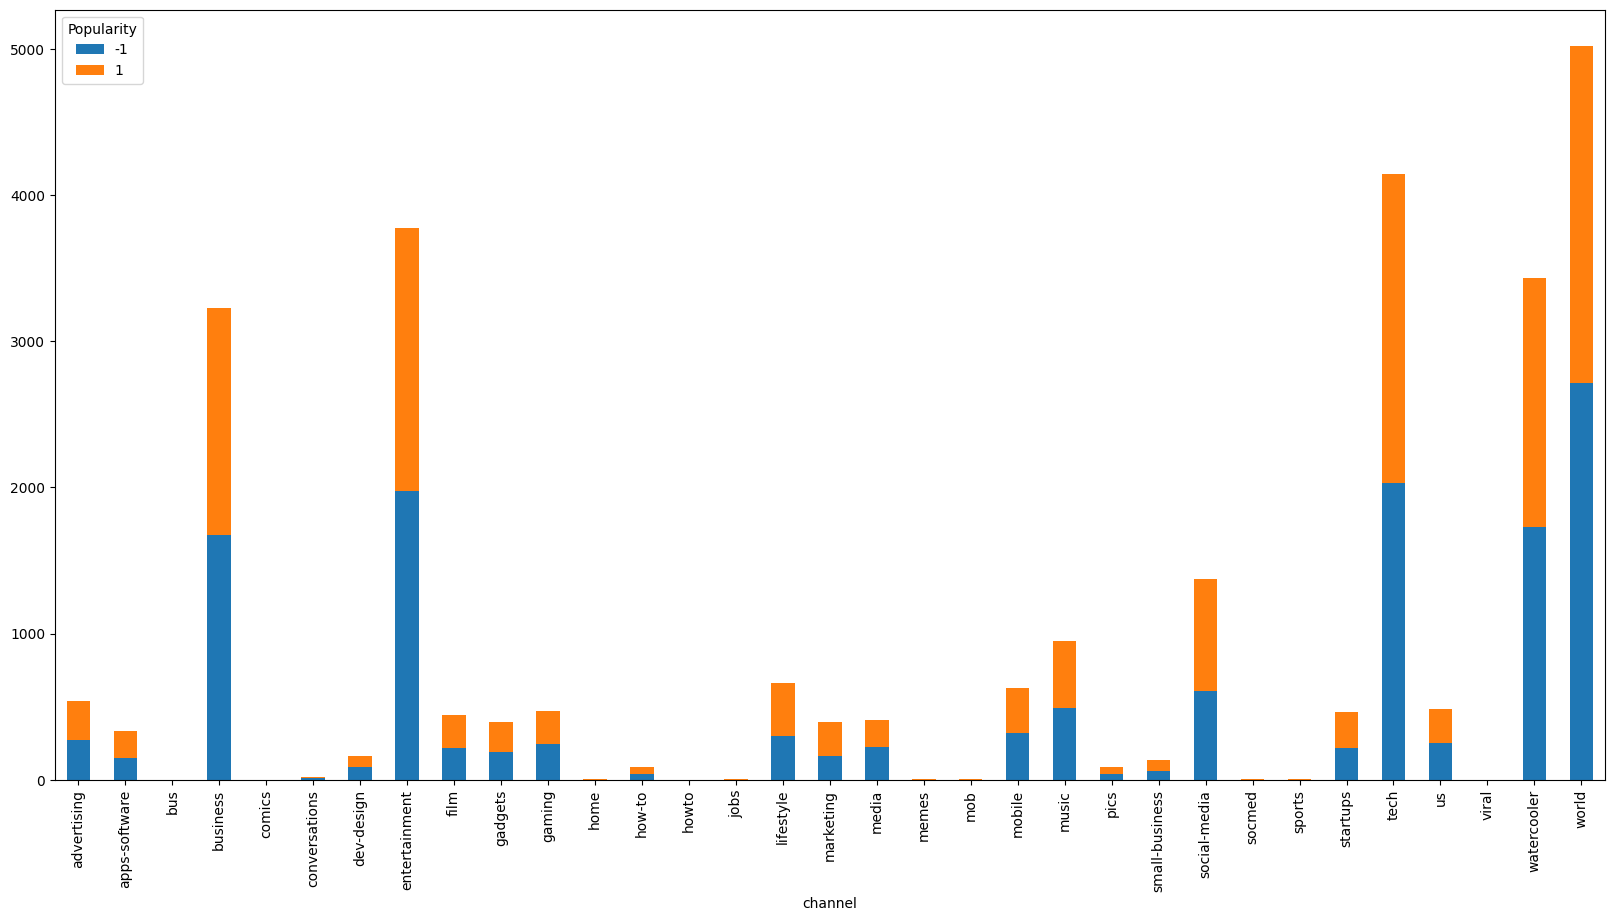

In [3]:
group = df.groupby(['channel', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['channel', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1          1  total
Weekday                                
0           52.753623  47.246377   4485
1           53.968254  46.031746   5040
2           54.594595  45.405405   5180
3           53.494729  46.505271   5122
4           47.103334  52.896666   4229
5           36.811441  63.188559   1888
6           39.434962  60.565038   1699


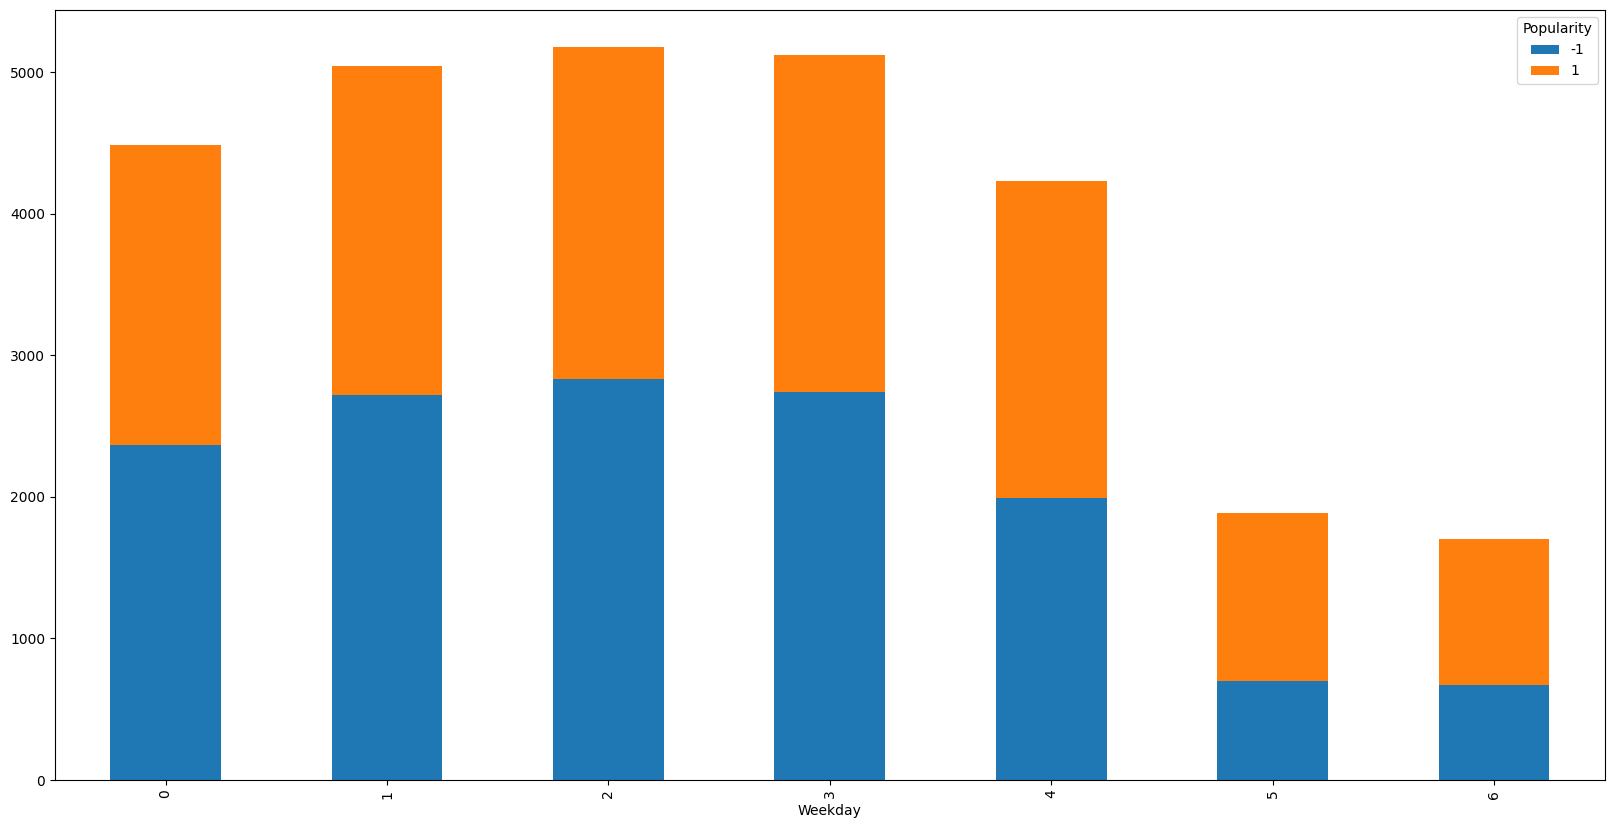

In [4]:
group = df.groupby(['Weekday', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Weekday', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity          -1           1   total
link_count                                
2            50.000000   50.000000     8.0
3            64.285714   35.714286    14.0
4            48.837209   51.162791    43.0
5            45.614035   54.385965   114.0
6            55.893536   44.106464   263.0
7            54.439252   45.560748   428.0
8            53.382534   46.617466   813.0
9            50.384944   49.615056  1169.0
10           50.131406   49.868594  1522.0
11           51.323944   48.676056  1775.0
12           52.137203   47.862797  1895.0
13           51.595745   48.404255  1880.0
14           51.362908   48.637092  1871.0
15           53.485647   46.514353  1707.0
16           51.093067   48.906933  1601.0
17           50.112867   49.887133  1329.0
18           51.655629   48.344371  1208.0
19           51.233397   48.766603  1054.0
20           48.231511   51.768489   933.0
21           49.413299   50.586701   767.0
22           49.399399   50.600601   666.0
23         

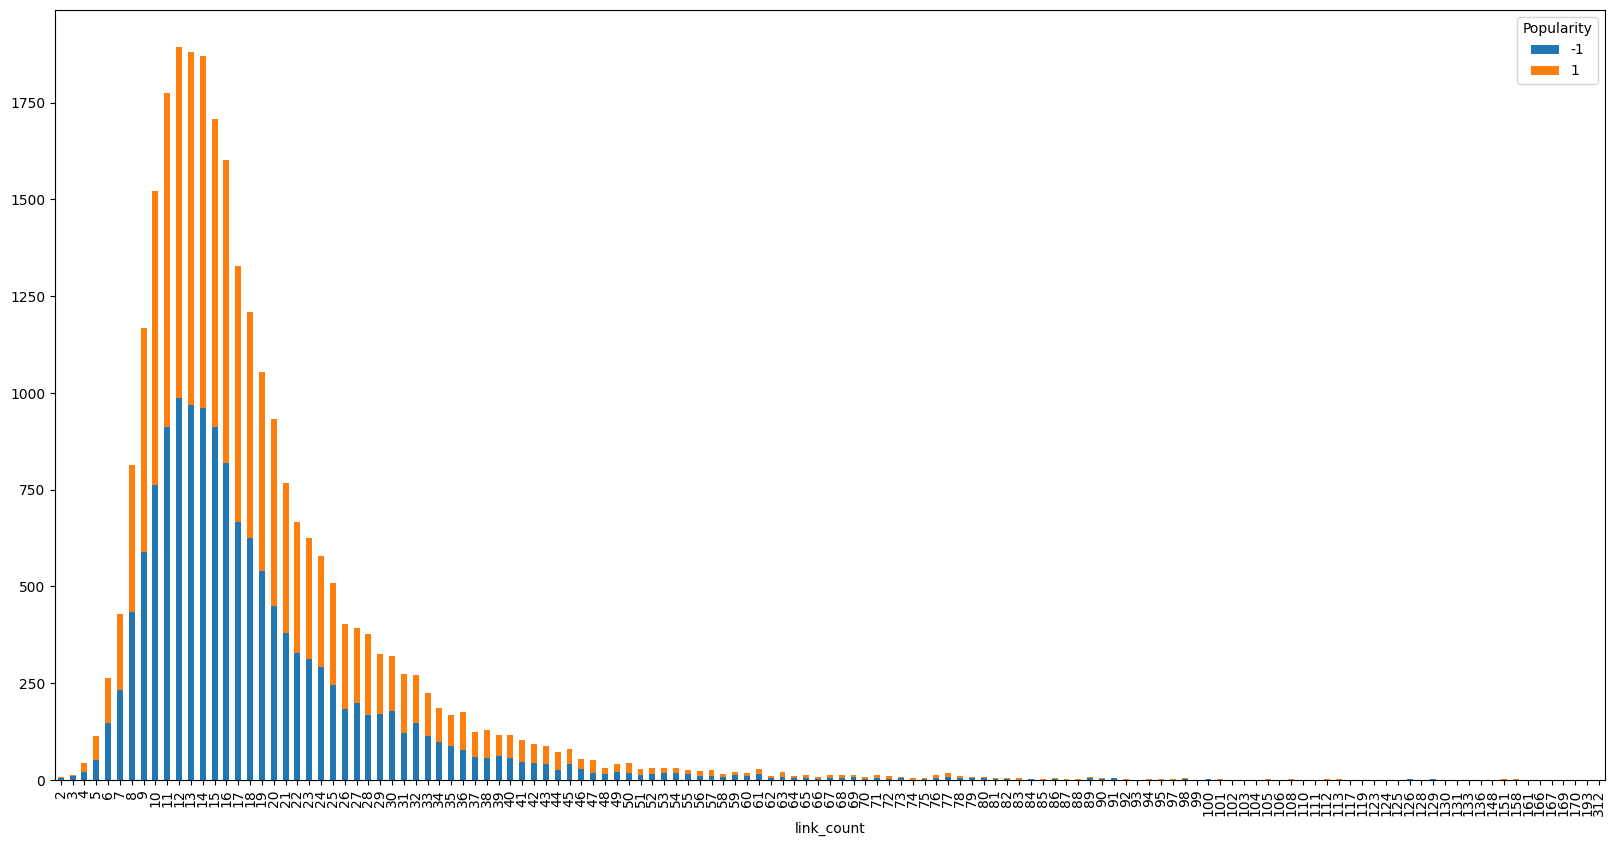

In [5]:
group = df.groupby(['link_count', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['link_count', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity          -1           1   total
img_count                                 
0            57.303371   42.696629   178.0
1            50.786358   49.213642  5659.0
2            51.675362   48.324638  8625.0
3            50.546448   49.453552  3294.0
4            51.558074   48.441926  1765.0
5            46.909091   53.090909   825.0
6            54.505495   45.494505   455.0
7            50.000000   50.000000   454.0
8            50.716332   49.283668   349.0
9            54.807692   45.192308   416.0
10           47.105263   52.894737   380.0
11           48.223350   51.776650   591.0
12           43.219265   56.780735   789.0
13           49.784483   50.215517   464.0
14           52.319588   47.680412   388.0
15           42.138365   57.861635   318.0
16           49.851632   50.148368   337.0
17           46.644295   53.355705   298.0
18           51.366120   48.633880   183.0
19           57.615894   42.384106   151.0
20           58.503401   41.496599   147.0
21         

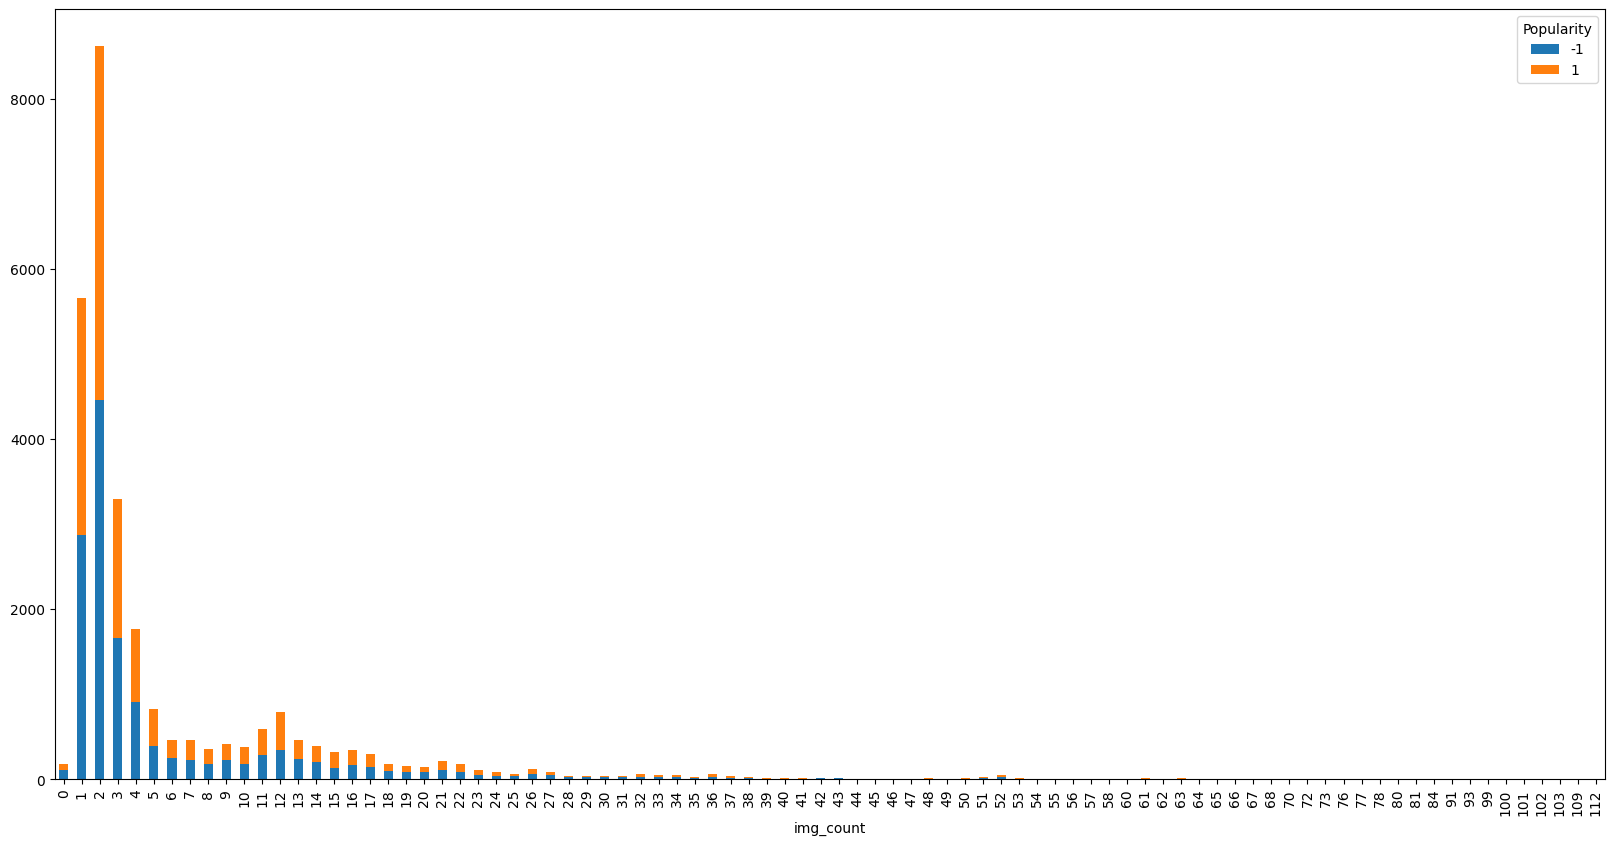

In [6]:
group = df.groupby(['img_count', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['img_count', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity                -1           1  total
categories_count                               
2                  62.068966   37.931034   29.0
8                  40.000000   60.000000    5.0
9                  56.363636   43.636364   55.0
10                 66.666667   33.333333    3.0
11                 33.333333   66.666667    3.0
12                 33.333333   66.666667   12.0
13                100.000000         NaN    1.0
14                 75.000000   25.000000    4.0
15                 51.515152   48.484848   33.0
16                 50.000000   50.000000    4.0
17                 40.000000   60.000000    5.0
18                 46.153846   53.846154   52.0
19                 13.333333   86.666667   15.0
20                 48.809524   51.190476   84.0
21                 61.904762   38.095238   21.0
22                 54.054054   45.945946   37.0
23                 48.717949   51.282051   39.0
24                 54.166667   45.833333  120.0
25                 48.387097   51.612903

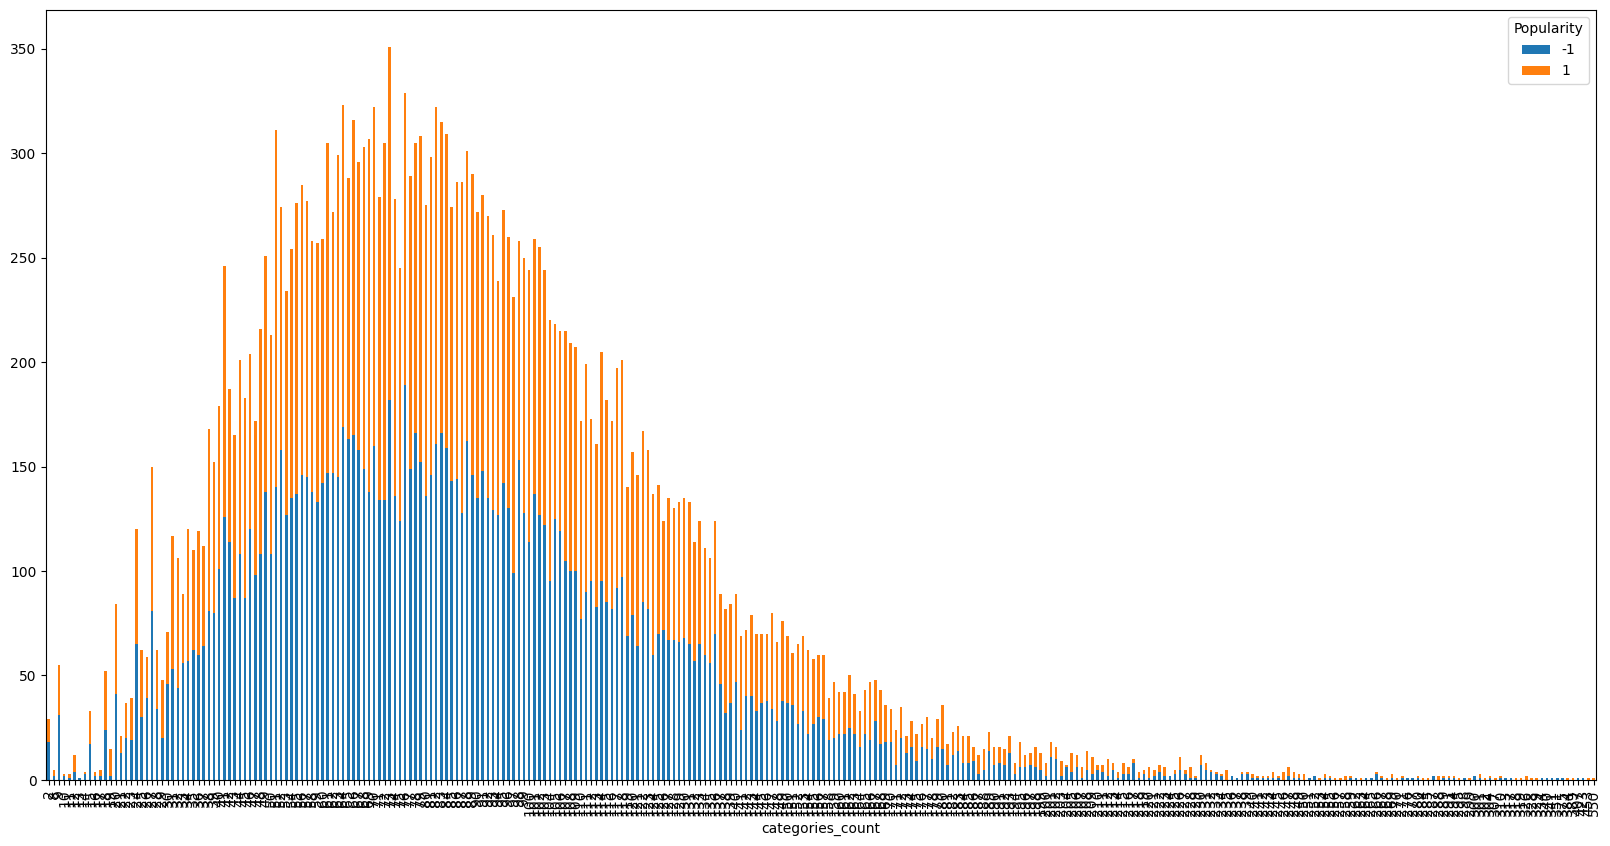

In [8]:
group = df.groupby(['categories_count', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['categories_count', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1          1  total
Month                                  
1           47.546451  52.453549   2099
2           46.732026  53.267974   2142
3           40.892019  59.107981   2130
4           42.851027  57.148973   2336
5           47.486535  52.513465   2228
6           53.424075  46.575925   2351
7           54.394299  45.605701   2526
8           53.375796  46.624204   2355
9           55.918026  44.081974   2391
10          56.884195  43.115805   2651
11          52.887538  47.112462   2303
12          53.120601  46.879399   2131


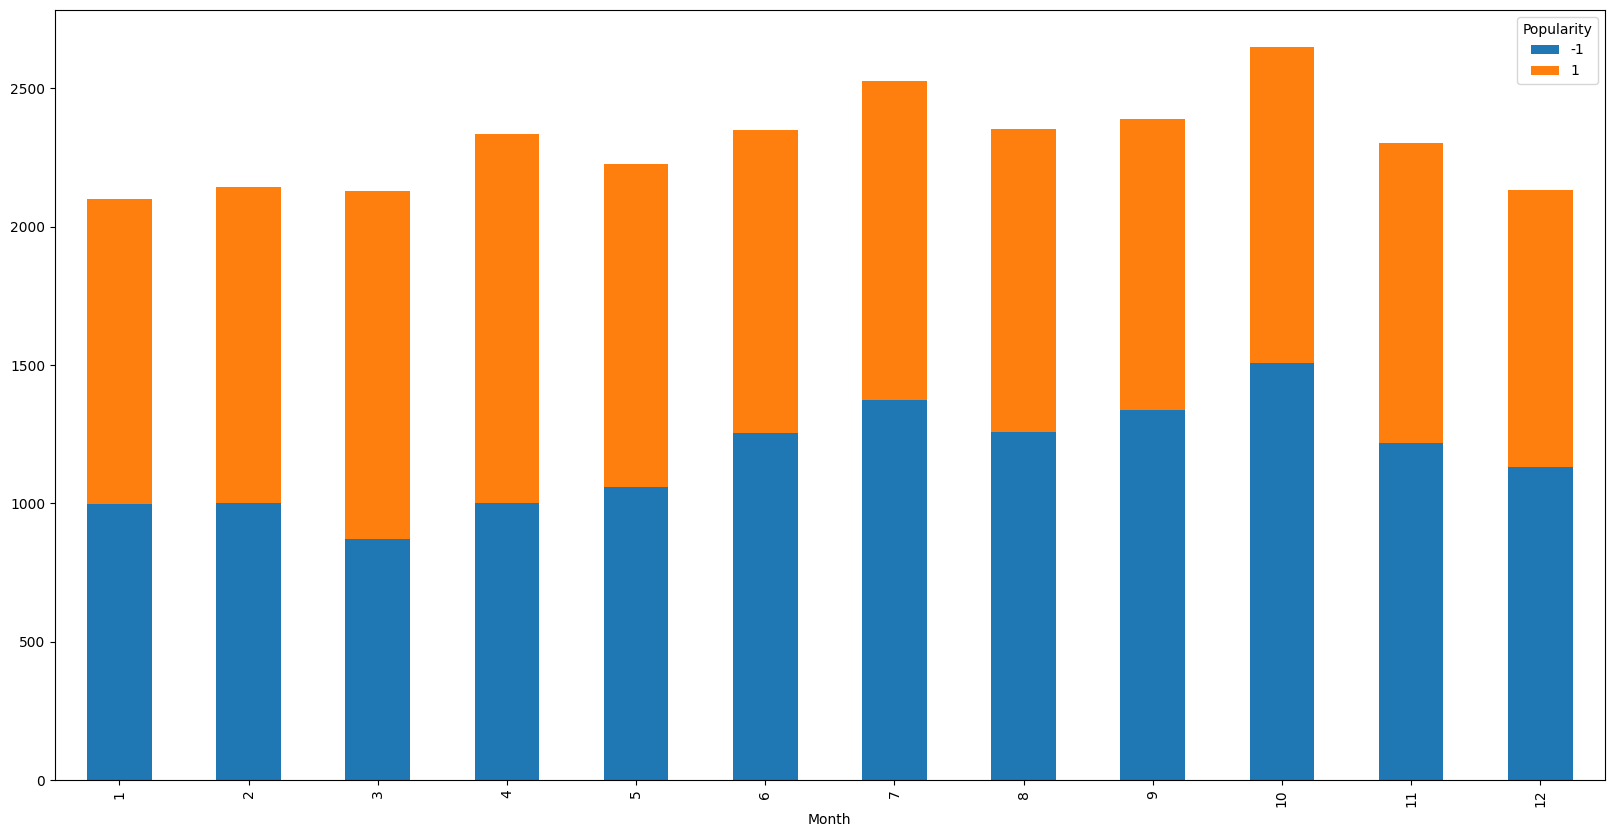

In [10]:
group = df.groupby(['Month', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Month', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1           1    total
Year                                      
2013        49.775041   50.224959  12669.0
2014        51.459293   48.540707  14973.0
2015              NaN  100.000000      1.0


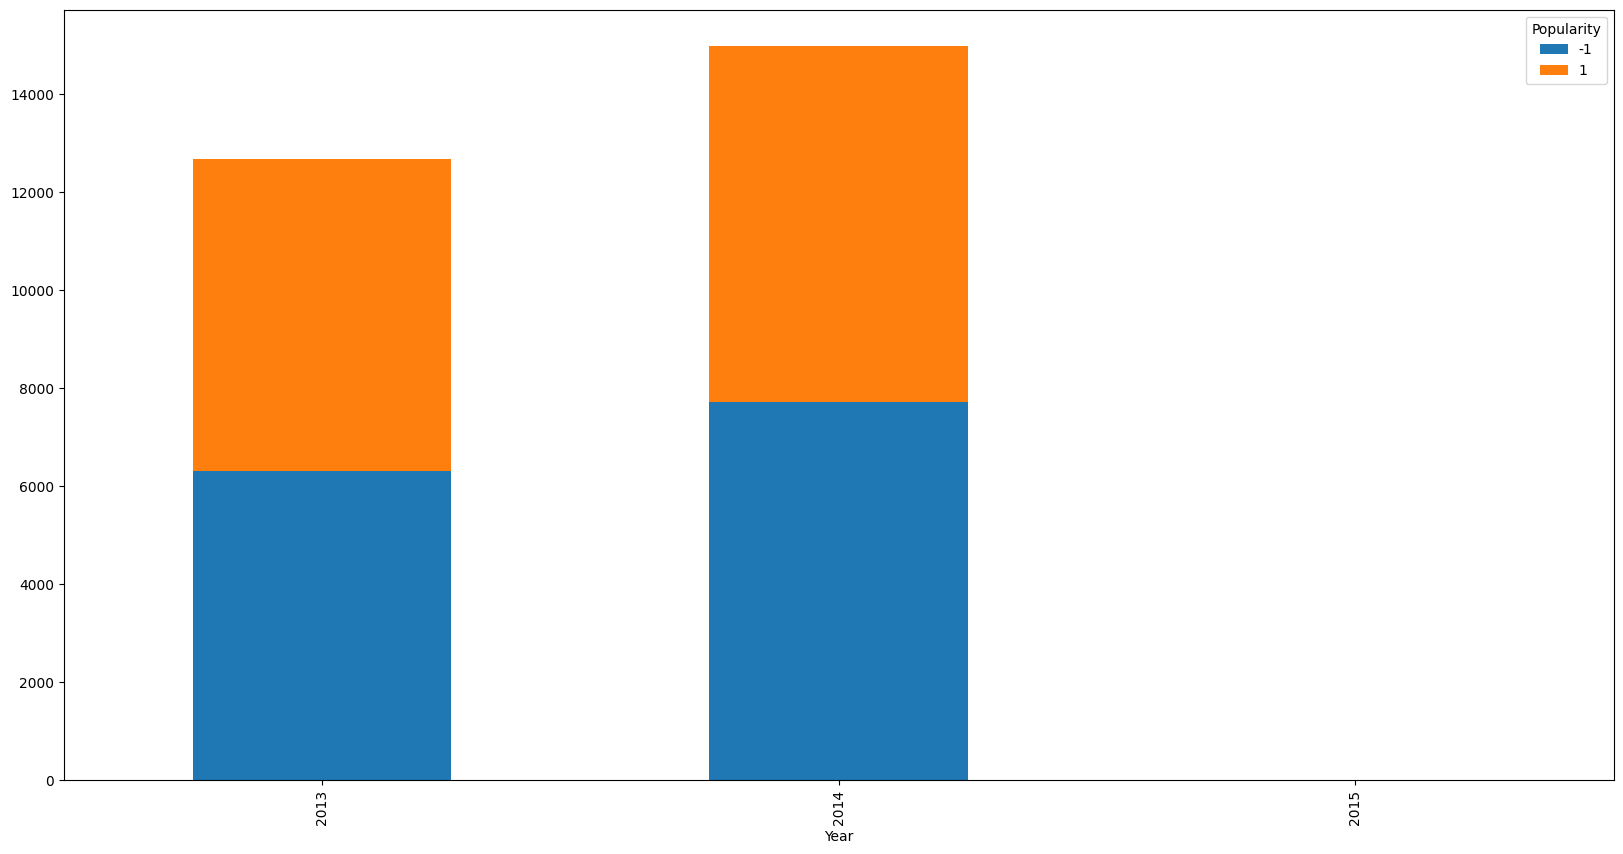

In [11]:
group = df.groupby(['Year', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Year', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1          1  total
Day                                    
1           55.693069  44.306931    808
2           50.746269  49.253731    804
3           50.568182  49.431818    880
4           49.891304  50.108696    920
5           49.509804  50.490196    816
6           48.797251  51.202749    873
7           51.419558  48.580442    951
8           49.945355  50.054645    915
9           49.638803  50.361197    969
10          53.359684  46.640316   1012
11          52.290837  47.709163   1004
12          54.479167  45.520833    960
13          49.727965  50.272035    919
14          53.668763  46.331237    954
15          50.269687  49.730313    927
16          51.345291  48.654709    892
17          52.284803  47.715197    941
18          51.440768  48.559232    937
19          50.645161  49.354839    930
20          47.385984  52.614016    899
21          47.878128  52.121872    919
22          51.900109  48.099891    921
23          50.625000  49.375000    960


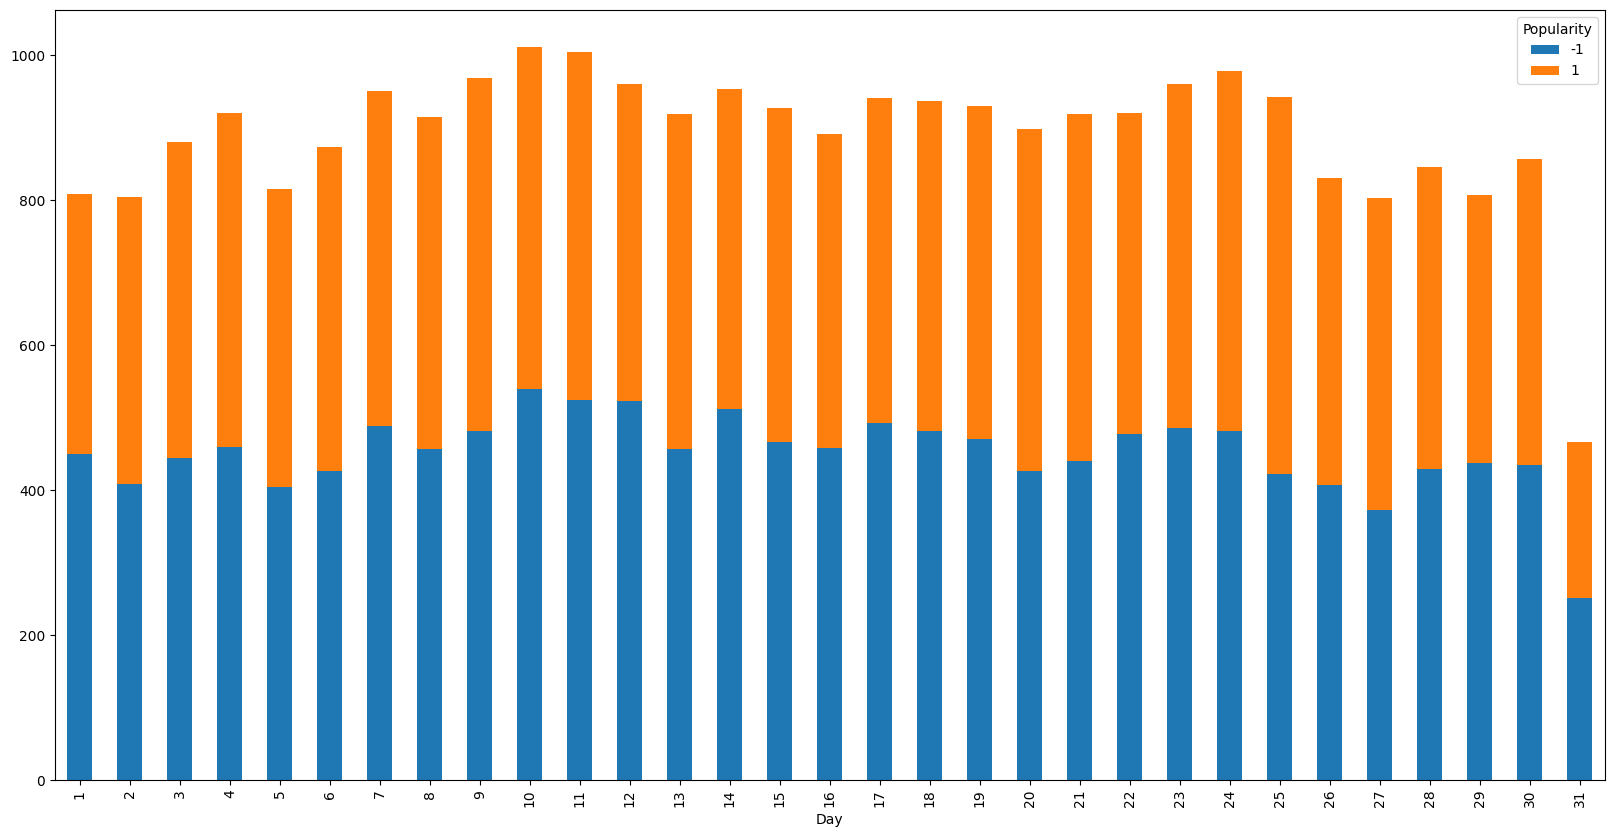

In [12]:
group = df.groupby(['Day', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Day', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1          1  total
Hour                                   
0           51.189343  48.810657   1051
1           50.335570  49.664430    894
2           49.045346  50.954654    838
3           48.413631  51.586369    851
4           46.428571  53.571429    644
5           44.416244  55.583756    394
6           49.258160  50.741840    337
7           47.527473  52.472527    364
8           49.122807  50.877193    342
9           48.372093  51.627907    430
10          50.503597  49.496403    695
11          48.568282  51.431718    908
12          50.665302  49.334698    977
13          53.292960  46.707040   1321
14          51.235294  48.764706   1700
15          49.975927  50.024073   2077
16          52.017937  47.982063   2007
17          52.051282  47.948718   1950
18          52.025250  47.974750   1901
19          51.068376  48.931624   1872
20          50.940355  49.059645   1861
21          51.300665  48.699335   1653
22          52.646436  47.353564   1417


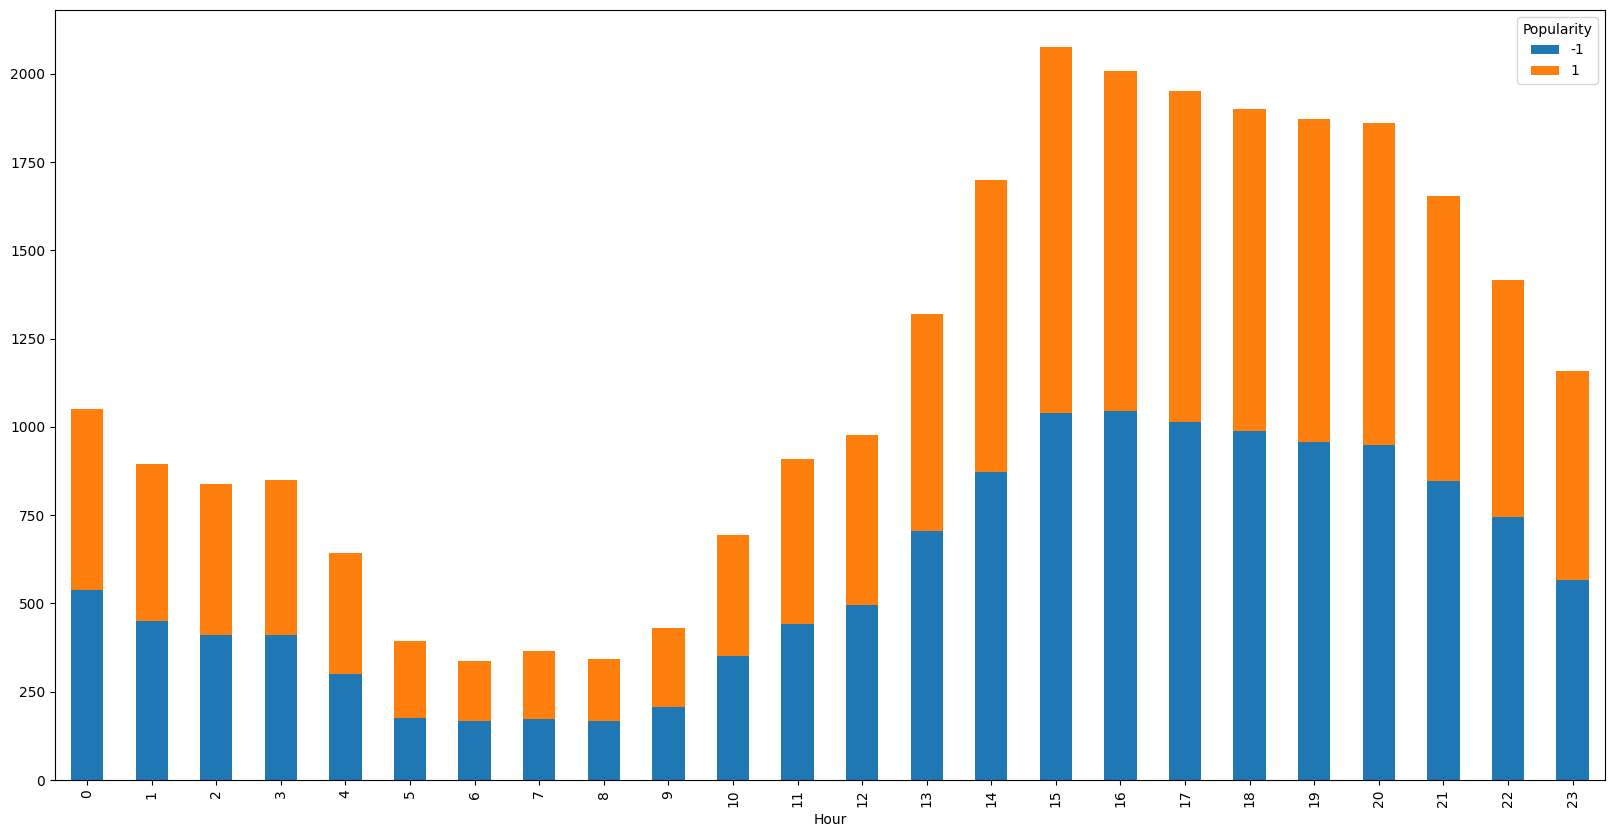

In [13]:
group = df.groupby(['Hour', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Hour', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1          1  total
Minutes                                
0           50.156740  49.843260   2233
1           49.371634  50.628366    557
2           50.988142  49.011858    506
3           48.780488  51.219512    533
4           45.996276  54.003724    537
5           51.941748  48.058252    412
6           47.198276  52.801724    464
7           47.002398  52.997602    417
8           48.029557  51.970443    406
9           46.022727  53.977273    352
10          47.677262  52.322738    409
11          51.116625  48.883375    403
12          52.054795  47.945205    365
13          47.536232  52.463768    345
14          52.393617  47.606383    376
15          50.911641  49.088359    713
16          51.603499  48.396501    343
17          48.710602  51.289398    349
18          55.162242  44.837758    339
19          51.851852  48.148148    324
20          52.445652  47.554348    368
21          57.142857  42.857143    336
22          43.626062  56.373938    353


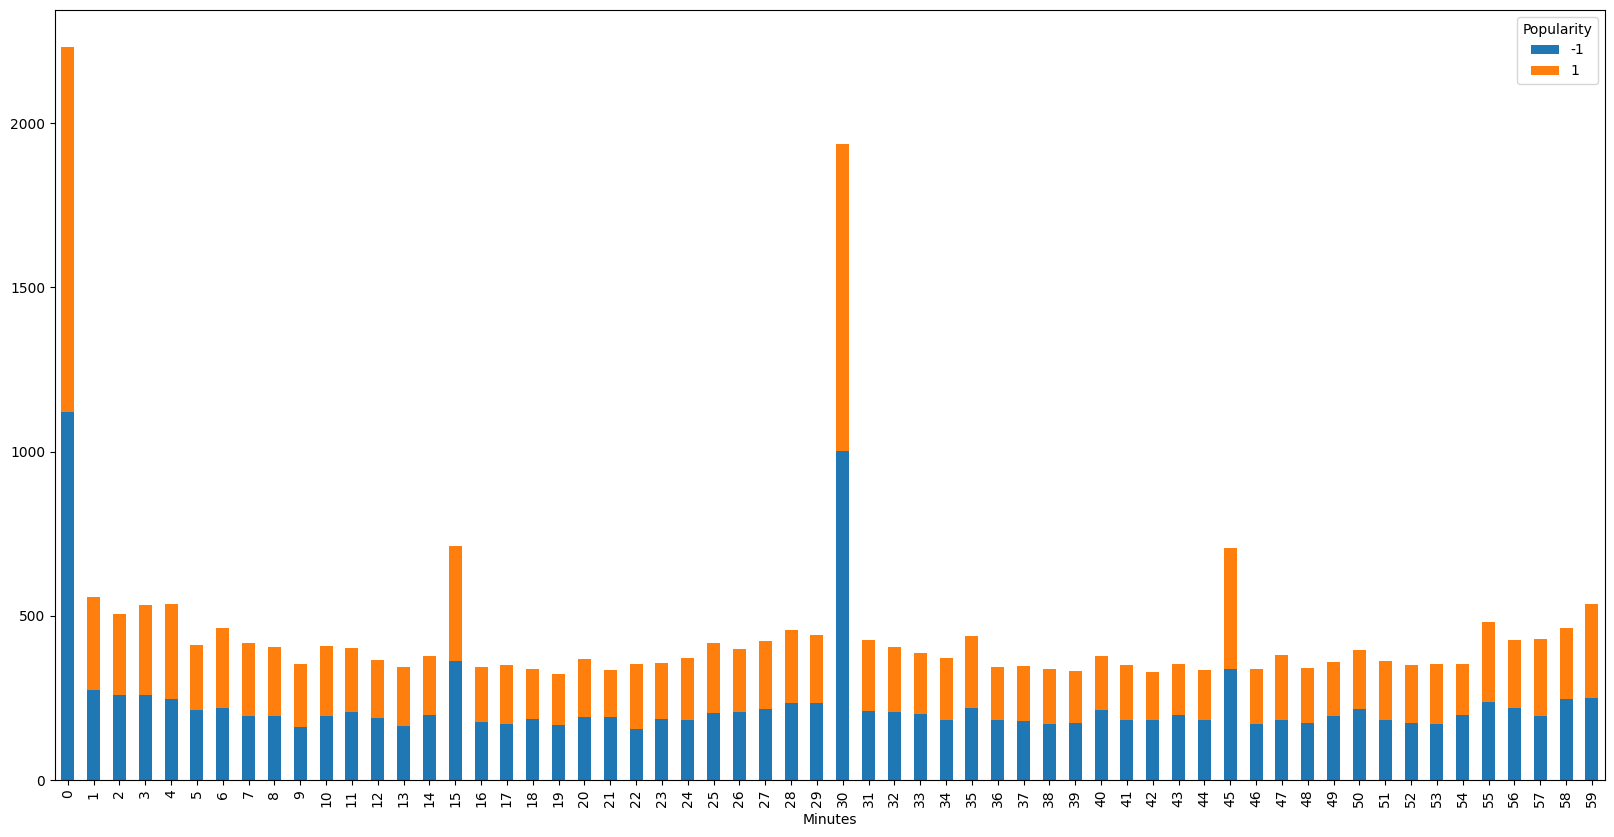

In [14]:
group = df.groupby(['Minutes', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Minutes', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1          1  total
Sec                                    
0           48.373102  51.626898    461
1           50.554324  49.445676    451
2           53.703704  46.296296    486
3           52.371134  47.628866    485
4           52.155172  47.844828    464
5           51.050420  48.949580    476
6           49.680171  50.319829    469
7           51.287554  48.712446    466
8           52.685950  47.314050    484
9           49.339207  50.660793    454
10          46.171171  53.828829    444
11          51.926978  48.073022    493
12          48.072562  51.927438    441
13          50.655022  49.344978    458
14          53.632479  46.367521    468
15          50.434783  49.565217    460
16          47.716895  52.283105    438
17          48.953975  51.046025    478
18          48.036952  51.963048    433
19          49.160671  50.839329    417
20          49.789916  50.210084    476
21          49.680171  50.319829    469
22          50.554324  49.445676    451


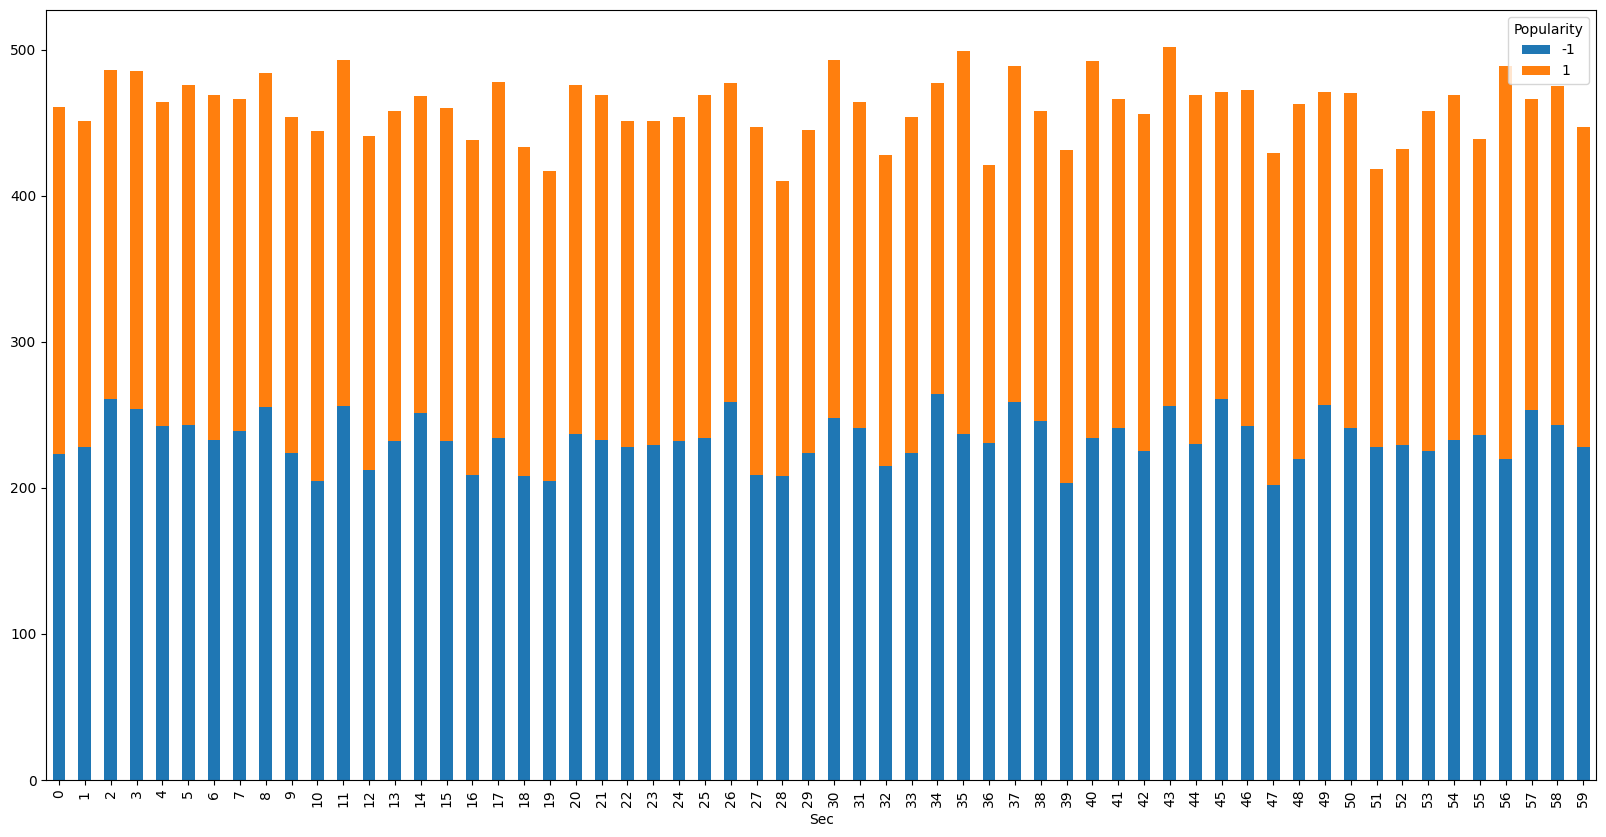

In [ ]:
group = df.groupby(['Sec', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Sec', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1           1    total
Timezone                                  
UTC         50.738588   49.261412  27011.0
UTC+01:00   46.666667   53.333333     30.0
UTC+02:00   37.500000   62.500000     24.0
UTC+03:00   60.000000   40.000000      5.0
UTC+05:00         NaN  100.000000      1.0
UTC+08:00   33.333333   66.666667     12.0
UTC+10:00   66.666667   33.333333      3.0
UTC+11:00   40.000000   60.000000      5.0
UTC-03:00         NaN  100.000000      1.0
UTC-04:00   50.943396   49.056604    106.0
UTC-05:00   49.382716   50.617284     81.0
UTC-06:00   41.666667   58.333333     24.0
UTC-07:00   49.218750   50.781250    256.0
UTC-08:00   50.000000   50.000000     84.0


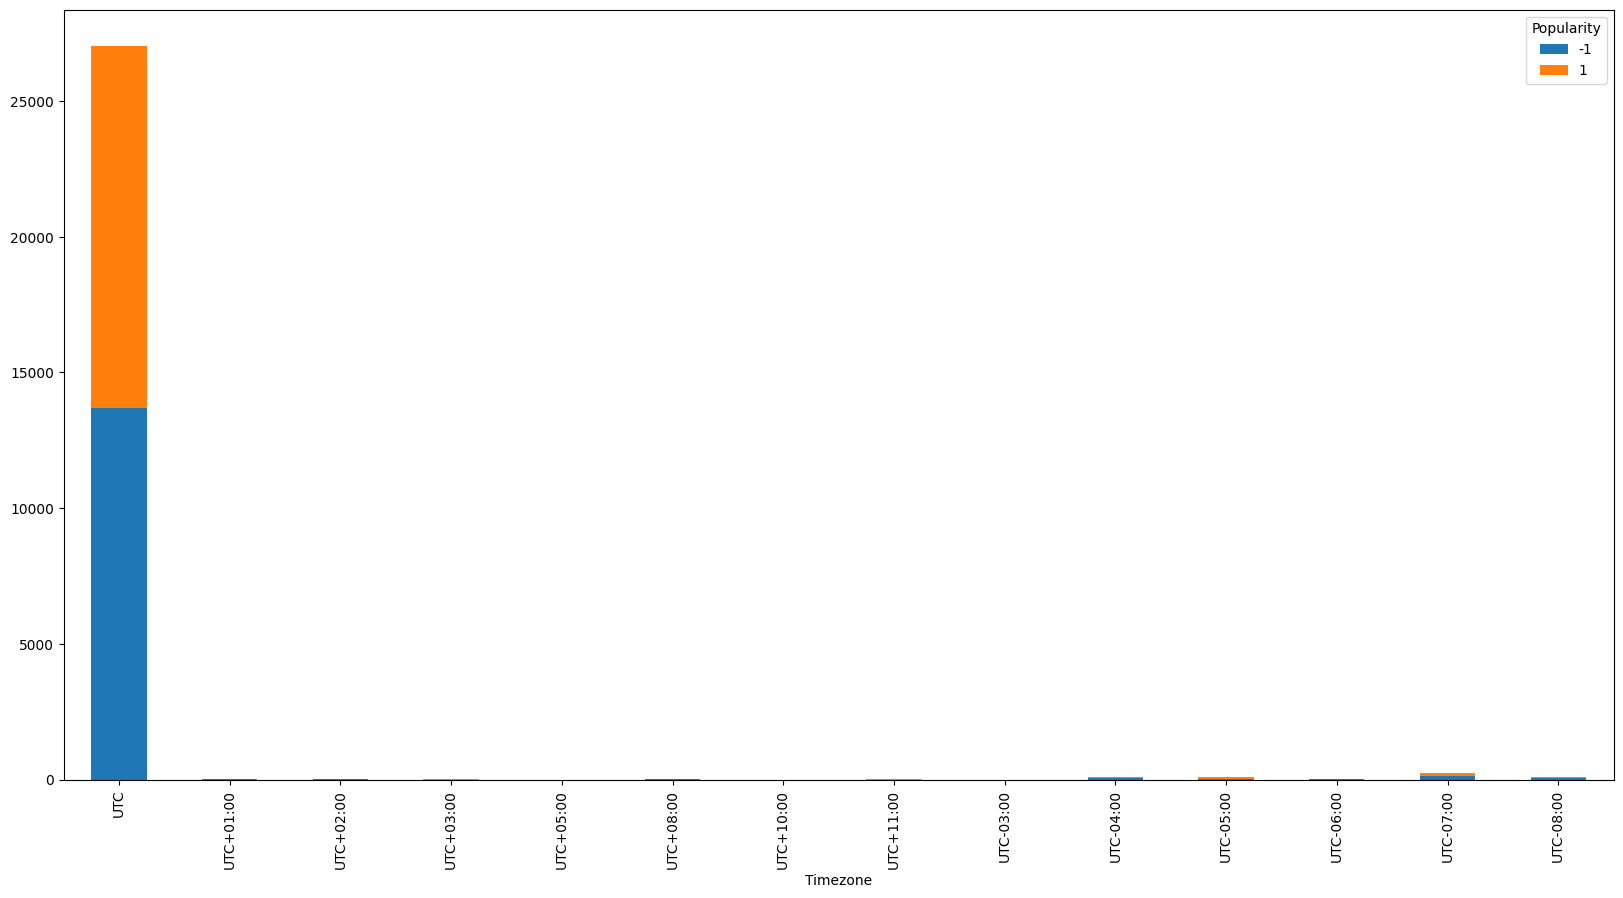

In [15]:
group = df.groupby(['Timezone', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Timezone', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity          -1           1   total
title_len                                 
1           100.000000         NaN     1.0
2            44.444444   55.555556    27.0
3            47.936508   52.063492   315.0
4            46.491904   53.508096  1297.0
5            50.677238   49.322762  3027.0
6            50.453649   49.546351  5070.0
7            49.992218   50.007782  6425.0
8            52.734375   47.265625  5632.0
9            51.371429   48.628571  3500.0
10           48.733786   51.266214  1619.0
11           53.597122   46.402878   556.0
12           45.890411   54.109589   146.0
13           63.636364   36.363636    22.0
14           80.000000   20.000000     5.0
15                 NaN  100.000000     1.0


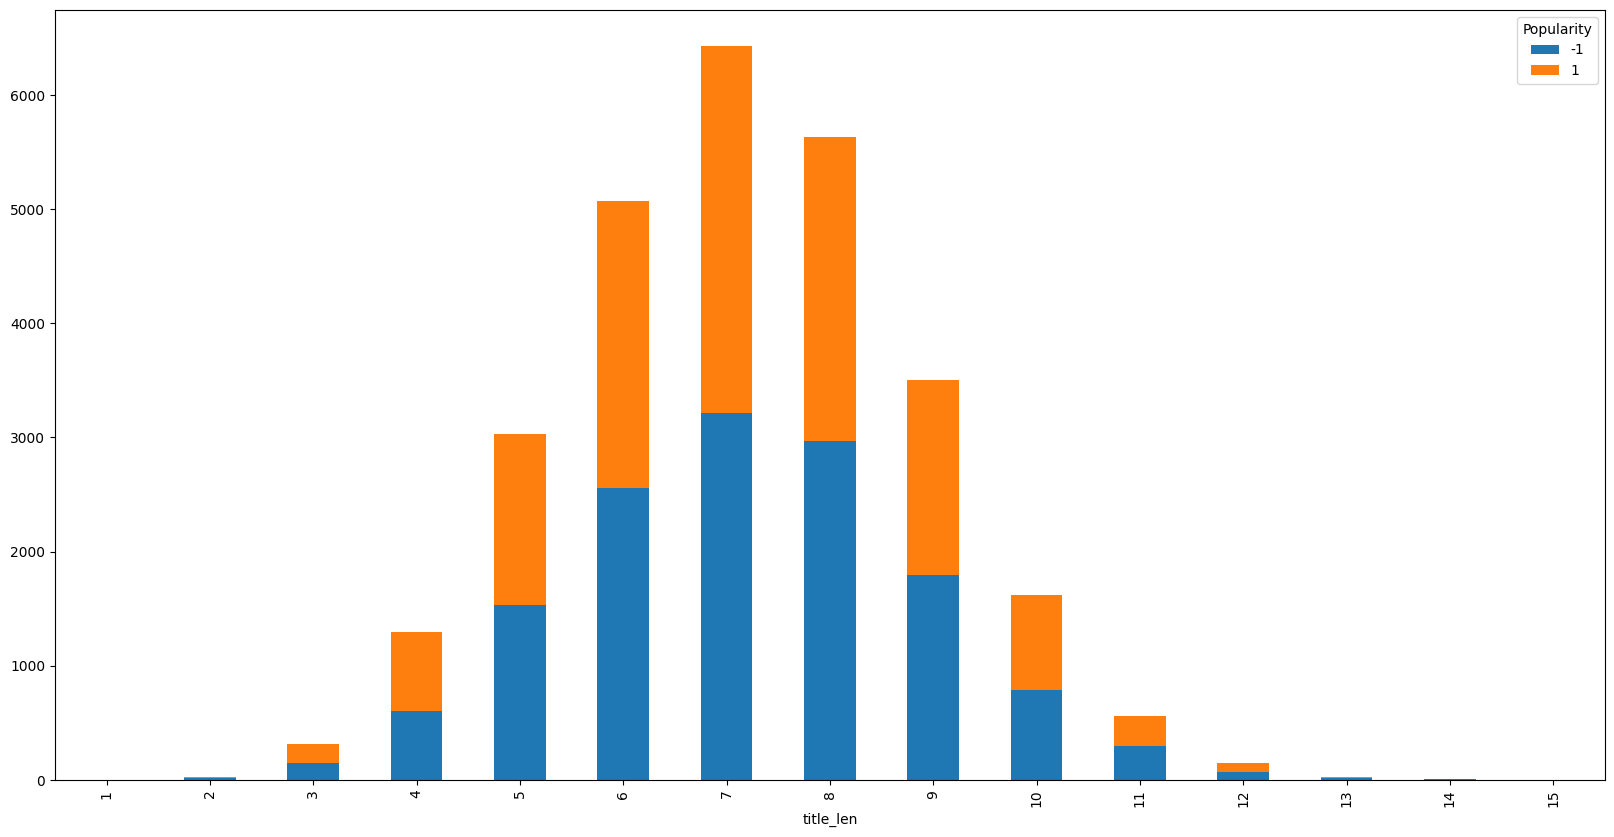

In [16]:
group = df.groupby(['title_len', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['title_len', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

In [17]:
df = pd.read_csv('../datasets_processed/train_processed.csv')
df.head()

,Id,Popularity,Page content
0,0,0,"['clara', 'moskowitz', 'space', 'com', 'utc', ..."
1,1,1,"['christina', 'warren2013', 'utcgoogl', 'new',..."
2,2,1,"['sam', 'laird2014', 'utcballin', 'nfl', 'draf..."
3,3,0,"['sam', 'laird2013', 'utccameraperson', 'fail'..."
4,4,0,"['connor', 'finnegan2014', 'utcnfl', 'star', '..."


Popularity           0          1  total
content_len                             
0-1000       51.203258  48.796742   2701
1000-2000    51.399254  48.600746   8576
10000-11000  44.751381  55.248619    181
11000-12000  48.333333  51.666667    120
12000-13000  45.555556  54.444444     90
13000-14000  53.846154  46.153846     52
14000-15000  55.319149  44.680851     47
15000-16000  39.130435  60.869565     23
16000-17000  35.000000  65.000000     20
17000-18000  40.000000  60.000000     15
18000-19000  25.000000  75.000000      4
19000-20000  33.333333  66.666667      9
2000-3000    50.791167  49.208833   5751
20000+       51.724138  48.275862     29
3000-4000    50.601765  49.398235   3739
4000-5000    48.480125  51.519875   2566
5000-6000    52.038369  47.961631   1668
6000-7000    51.434644  48.565356    941
7000-8000    47.348485  52.651515    528
8000-9000    49.595687  50.404313    371
9000-10000   48.113208  51.886792    212


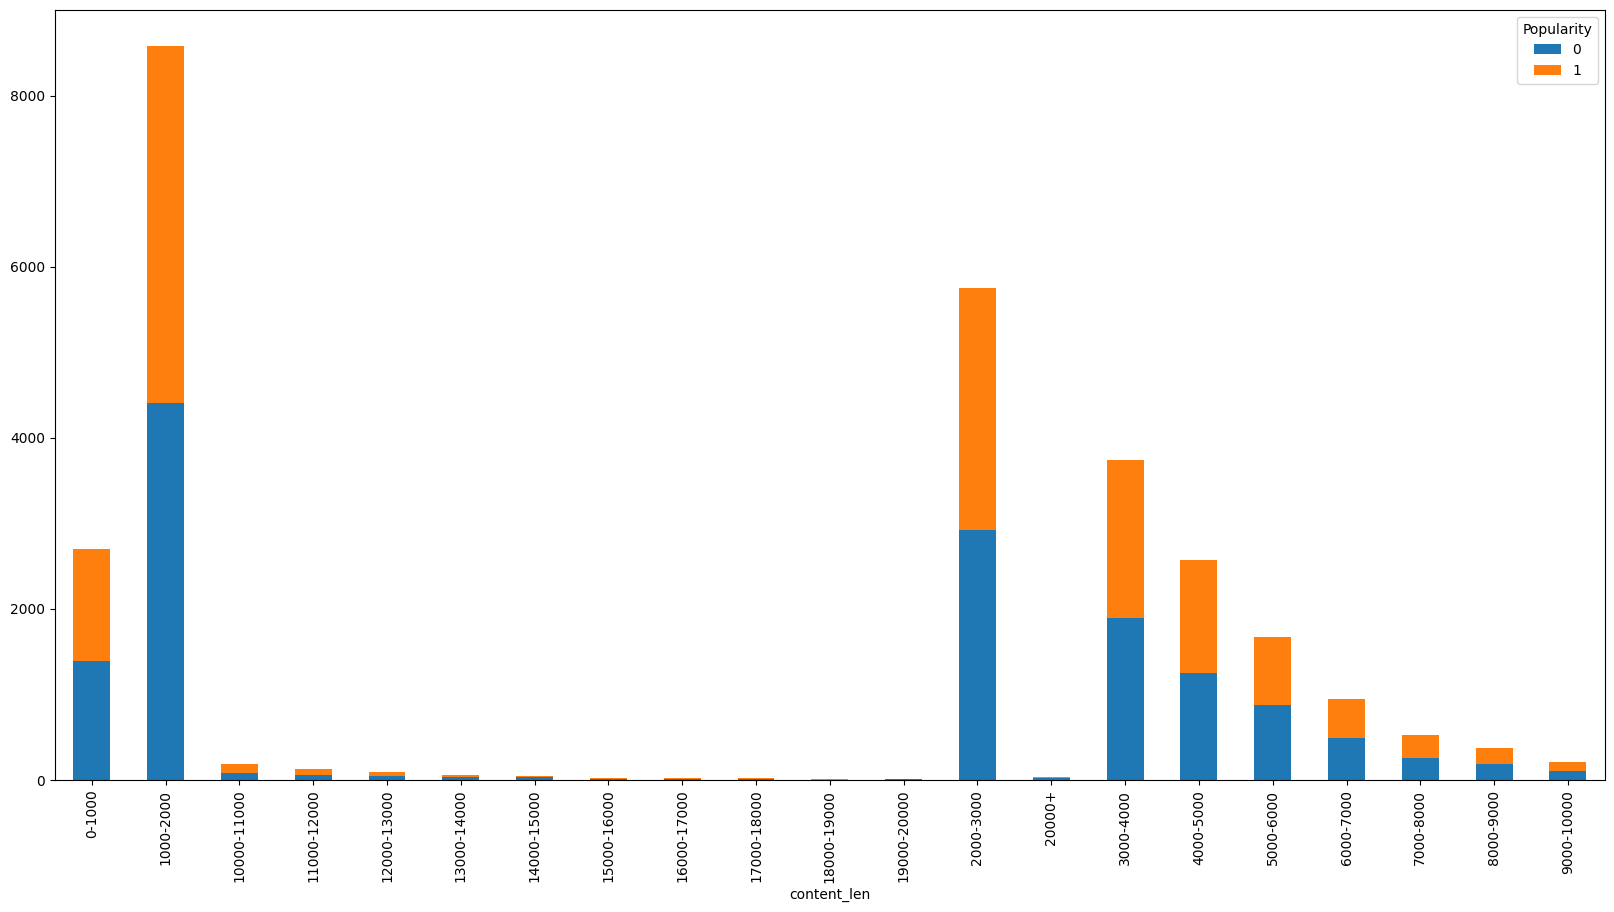

In [19]:
# append it to 30000
def bucket_len(x):
    if x < 1000:
        return '0-1000'
    elif x < 2000:
        return '1000-2000'
    elif x < 3000:
        return '2000-3000'
    elif x < 4000:
        return '3000-4000'
    elif x < 5000:
        return '4000-5000'
    elif x < 6000:
        return '5000-6000'
    elif x < 7000:
        return '6000-7000'
    elif x < 8000:
        return '7000-8000'
    elif x < 9000:
        return '8000-9000'
    elif x < 10000:
        return '9000-10000'
    elif x < 11000:
        return '10000-11000'
    elif x < 12000:
        return '11000-12000'
    elif x < 13000:
        return '12000-13000'
    elif x < 14000:
        return '13000-14000'
    elif x < 15000:
        return '14000-15000'
    elif x < 16000:
        return '15000-16000'
    elif x < 17000:
        return '16000-17000'
    elif x < 18000:
        return '17000-18000'
    elif x < 19000:
        return '18000-19000'
    elif x < 20000:
        return '19000-20000'
    else :
        return '20000+'

df['content_len'] = df['Page content'].apply(len)
df['content_len'] = df['content_len'].apply(bucket_len)
group = df.groupby(['content_len', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['content_len', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)